<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Lab_Logistica_Resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns

path_data = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'


# Exercício

Empregue o `scikit-learn` para criar os seguintes modelos:

1. Um **modelo de Regressão Múltipla** para a partir das outras medidas de sépalas e pétalas estimar o valor de comprimento de pétala. Faça então a estimativa do valor comprimento de pétala para flores que apresentam medidas correspondentes aos quartis (Q1 e Q3) dos demais valores.

1. Um **modelo de Regressão Logística** para a partir das medidas de sépalas e pétalas estimar a espécie da flor. Faça então a estimativa da espécie para flores que apresentam medidas correspondentes aos quartis (Q1 e Q3) das medidas de pétalas e sépalas.




In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


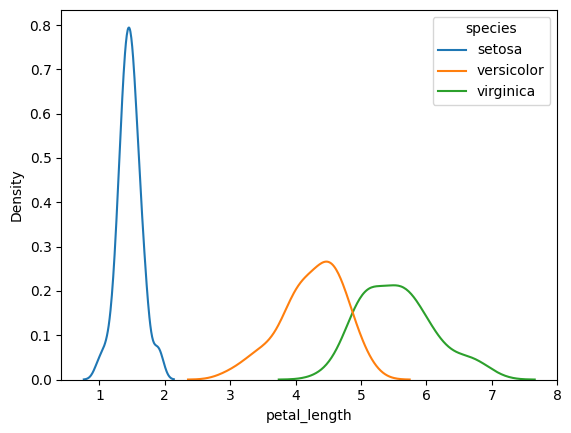

In [3]:
sns.kdeplot(x='petal_length',hue='species',data=iris)
plt.show()


# Esquema Geral do Aprendizado Supervisionado com o `scikit-learn`



In [4]:
df = pd.read_csv(path_data + 'PierceCricketData.csv')
df['Temperature'] = np.round(( df['Temperature'] - 32 ) * 5/9,2)
df

,Chirps/Minute,Temperature
0,20.0,31.44
1,16.0,22.00
2,19.8,34.06
3,18.4,29.06
4,17.1,27.00
5,15.5,24.00
6,14.7,20.94
7,17.1,27.78
8,15.4,20.78
9,16.2,28.50


In [5]:
from sklearn import linear_model

X=df[['Chirps/Minute']]
y=df['Temperature']

reg = linear_model.LinearRegression()

reg.fit(X, y)


LinearRegression()

```
      X=df[['Chirps/Minute']]
      y=df['Temperature']
```
1. Define o nosso conjunto de treinamento, com as entradas e saídas. No nosso exemplo há um único conjunto de valores de entrada representado pelos valores de frequência dos gorgeios. O `X` (maísculo), empregado, denota que podemos ter entradas de mais que uma dimensão, caso em que $X = (x_1, ..., x_n)$. 

```
      reg = linear_model.LinearRegression()
```

2. Define a classe de modelo a ser empregada. No caso definimos um modelo de regressão linear, mas outros tipos de função podem ser empregados como você verá mais adiante.

```
      reg.fit(X, y)
```

3. A o método `fit(X,y)` aplicado ao estimador instanciado `reg` realiza o aprendizado, que consiste em obter os melhores parâmetros do modelo definido. No caso do modelo linear, e sendo uma função de uma única variável, esses parâmetros são os coeficientes independente $a_0$ e $a_1$.

Você pode acessar esses coeficientes como a seguir.

In [6]:
reg.coef_

array([1.82894339])

In [7]:
reg.intercept_

-3.7693372345321947

Você pode agora empregar diretamente esses valores para estimar novos valores, por exemplo a temperatura para 16 ou 22 gorgeios/min.

In [8]:
X_test = pd.DataFrame({'Chirps/Minute':[12, 22]})
y_pred = reg.intercept_ + reg.coef_ * X_test.values
y_pred

array([[18.17798343],
       [36.46741732]])

Mas é preferível você empregar o método `predict()` aplicando-o ao estimador para fazer este cálculo. Para a função linear o uso direto dos coeficientes é simples, mas para outras classes de funções as formas de cálculo e os parâmetros podem ser bem complexos de aplicar. 

```
      reg.predict(X_test)
``` 



In [9]:
X_test = pd.DataFrame({'Chirps/Minute':[12, 22]})
y_pred = reg.predict(X_test)
y_pred

array([18.17798343, 36.46741732])

A seguir, o resultado do modelo aplicado a 100 diferentes valores de entrada.

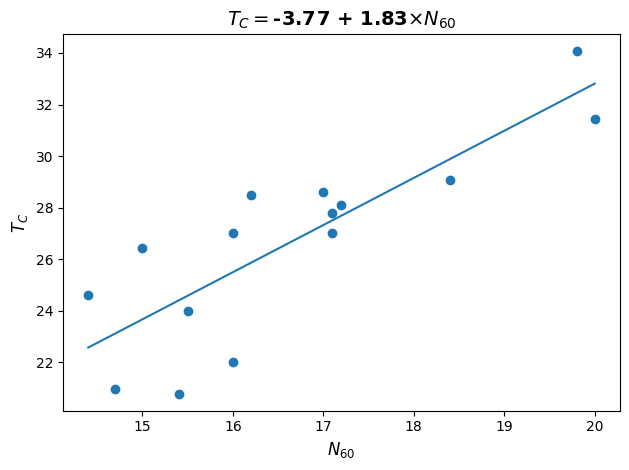

In [10]:
X_test = pd.DataFrame({'Chirps/Minute':np.linspace(df['Chirps/Minute'].min(),df['Chirps/Minute'].max(),100)})
y_pred = reg.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(x=df['Chirps/Minute'], y=df['Temperature'])
ax.plot(X_test, y_pred)

ax.set_title('$T_{C}=$' + str(np.round(reg.intercept_,2)) + ' + ' + str(np.round(reg.coef_[0],2)) + '$\\times N_{60}$' ,fontsize=14,weight='bold')
ax.set_xlabel('$N_{60}$',fontsize=12)
ax.set_ylabel('$T_{C}$',fontsize=12)

plt.tight_layout()
plt.show()